In [1]:
#“I used multiple linear regression with preprocessing via a pipeline and 
#evaluated the model using MAE and R².
#I also visualized multivariate relationships using 3D plots.”

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marksprediction12/Student_Marks.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
import pandas as pd

#dataset
df = pd.read_csv("/kaggle/input/marksprediction12/Student_Marks.csv")


In [5]:
#inspect the data
df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [6]:
df.shape


(100, 3)

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [8]:
df.describe()


,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [9]:
df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [10]:
# for the eda visualization
import matplotlib.pyplot as plt
import seaborn as sns



In [11]:
df.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

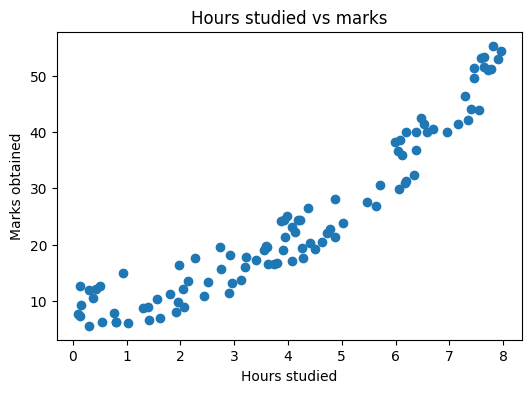

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(df['time_study'], df['Marks'])
plt.xlabel("Hours studied")
plt.ylabel("Marks obtained")
plt.title("Hours studied vs marks")
plt.show()

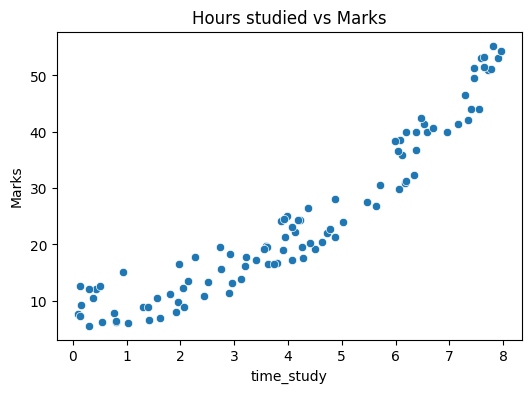

In [13]:
# for the seaborn
plt.figure(figsize=(6,4))
sns.scatterplot(x='time_study',y='Marks',data=df)
plt.title("Hours studied vs Marks")
plt.show()

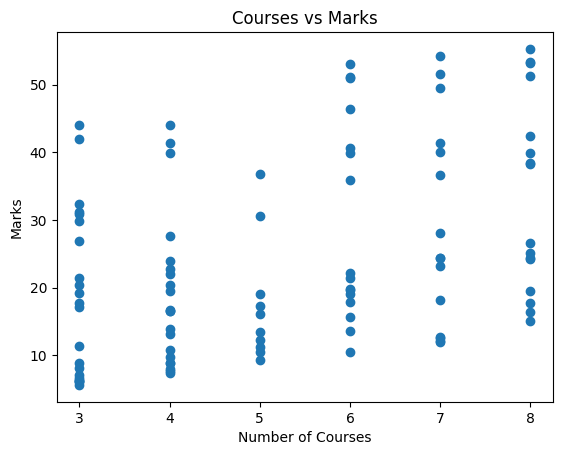

In [14]:
plt.scatter(df['number_courses'], df['Marks'])
plt.xlabel("Number of Courses")
plt.ylabel("Marks")
plt.title("Courses vs Marks")
plt.show()


In [15]:
x=df[['time_study','number_courses']]
y=df['Marks']

In [16]:
x.shape,y.shape

((100, 2), (100,))

In [17]:
#Model Training

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
x_train.shape,x_test.shape

((80, 2), (20, 2))

In [20]:
#datapreprocessing
from sklearn.preprocessing import StandardScaler
from sklearn .pipeline import Pipeline
from sklearn .linear_model import LinearRegression


In [21]:
pipeline=Pipeline([
    ("scaler",StandardScaler()),
    ("model",LinearRegression())
])

In [22]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [23]:
y_pred = pipeline.predict(x_test)

In [24]:
from sklearn.metrics import mean_absolute_error, r2_score


In [25]:
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("mean absolute error (mae):",mae)
print("r2score",r2)

mean absolute error (mae): 3.079345229666692
r2score 0.9459936100591211


In [26]:
coefficients = pipeline.named_steps['model'].coef_

for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef}")


time_study: 12.182811923744504
number_courses: 3.344577332904938


#Visualizations (2D + 3D)

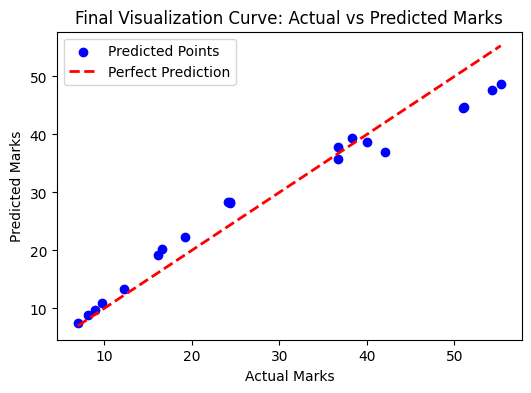

In [27]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,4))

plt.scatter(y_test, y_pred, color='blue', label='Predicted Points')


plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    linewidth=2,
    label='Perfect Prediction'
)

plt.xlabel("Actual Marks")
plt.ylabel("Predicted Marks")
plt.title("Final Visualization Curve: Actual vs Predicted Marks")
plt.legend()
plt.show()


In [28]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# Grid
x_input = np.linspace(df['time_study'].min(), df['time_study'].max(), 30)
y_input = np.linspace(df['number_courses'].min(), df['number_courses'].max(), 30)
xGrid, yGrid = np.meshgrid(x_input, y_input)

# Predict surface
grid = pd.DataFrame(
    np.vstack([xGrid.ravel(), yGrid.ravel()]).T,
    columns=['time_study', 'number_courses']
)

zGrid = pipeline.predict(grid).reshape(xGrid.shape)

# Plot
fig = px.scatter_3d(
    df, x='time_study', y='number_courses', z='Marks',
    opacity=0.7
)

fig.add_trace(
    go.Surface(x=xGrid, y=yGrid, z=zGrid, opacity=0.5)
)

fig.update_layout(
    scene=dict(zaxis=dict(range=[0, 100]))
)

fig.show()
